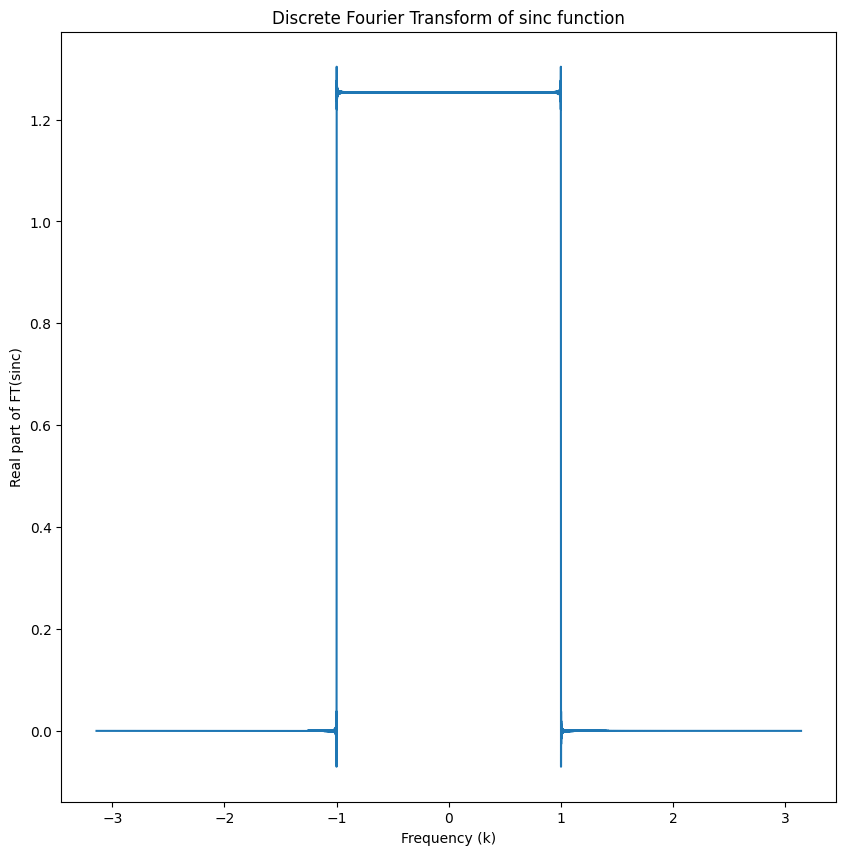

In [3]:
# Question 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sinc(x):
    if x != 0:
        return np.sin(x) / x
    else:
        return 1

x_limit = 5000
n = 10001
delta_x = 2 * x_limit / (n - 1)

x_values = np.linspace(-x_limit, x_limit, n)

sinc_values = np.vectorize(sinc, otypes=[float])(x_values)

sampling_freq = 2 * np.pi / (n * delta_x)
frequencies = sampling_freq * np.arange(-(n - 1) / 2, (n - 1) / 2 + 1)

dft = np.fft.fft(sinc_values, norm="ortho")
dft = np.fft.fftshift(dft)

scaling_factor = delta_x * np.sqrt(n / (2 * np.pi)) * np.exp(-1j * frequencies * np.min(x_values))
scaled_dft = scaling_factor * dft

fig1 = plt.figure(figsize=(10, 10))
plt.plot(frequencies, np.real(scaled_dft))
plt.xlabel('Frequency (k)')
plt.ylabel('Real part of FT(sinc)')
plt.title('Discrete Fourier Transform of sinc function')
plt.show()

In [4]:
# Define parameters
xlim = 5000
n = 10001
Delta = 2 * xlim / (n - 1)

x = np.linspace(-xlim, xlim, n)

# Compute function values
fx = np.vectorize(sinc, otypes=[float])(x)

# Create frequency values
k = (2 * np.pi / (n * Delta)) * np.arange(-(n - 1) / 2, (n - 1) / 2 + 1)

dft = np.fft.fftshift(np.fft.fft(fx, norm="ortho"))

factor = Delta * np.sqrt(n / (2 * np.pi)) * np.exp(-1j * k * np.min(x))

ft_dft = factor * dft

In [5]:
# Question 2
dataq2 = pd.read_csv('q2_data.csv',sep=",",header=None)
print(dataq2)

             0             1
0      3.14134 -5.425350e-16
1     -3.14185 -9.869420e-04
2      3.14134  1.973560e-03
3     -3.14185 -2.960820e-03
4      3.14134  3.947130e-03
...        ...           ...
9996  -3.14184  4.934710e-03
9997   3.14134 -3.947130e-03
9998  -3.14185  2.960820e-03
9999   3.14134 -1.973560e-03
10000 -3.14185  9.869420e-04

[10001 rows x 2 columns]


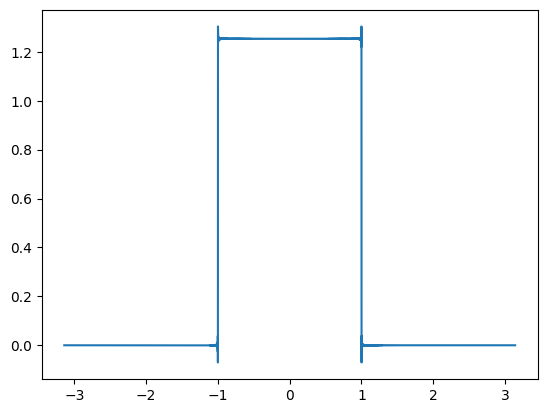

In [6]:
# Convert the DataFrame to a NumPy array
data_array = dataq2.to_numpy()

# Extract the real and imaginary parts to create a complex number array
ft_C = data_array[:, 0] + 1j * data_array[:, 1]

# Apply the necessary scaling factor, perform FFT shift, and normalize the array
ft_C = factor * np.fft.fftshift(ft_C) / np.sqrt(n)

plt.plot(k,np.real(ft_C))


             0         1
0      3.14134  0.000000
1     -3.14185 -0.000987
2      3.14134  0.001974
3     -3.14185 -0.002961
4      3.14134  0.003947
...        ...       ...
9996  -3.14184  0.004935
9997   3.14134 -0.003947
9998  -3.14185  0.002961
9999   3.14134 -0.001974
10000 -3.14185  0.000987

[10001 rows x 2 columns]


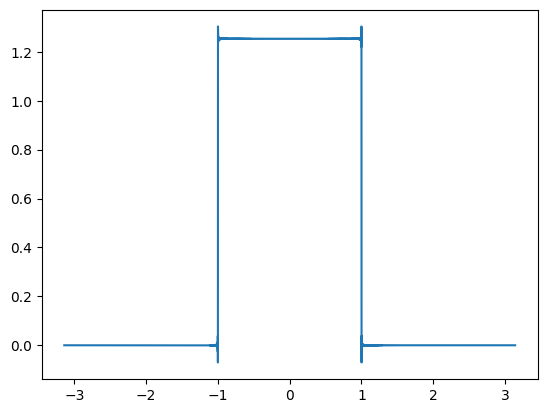

In [7]:
# Question 3

# Read the CSV file into a DataFrame
csv_dataframe = pd.read_csv('q3_data.csv', sep=",", header=None)

# Display the DataFrame
print(csv_dataframe)

# Convert the DataFrame to a NumPy array
data_array = csv_dataframe.to_numpy()

# Extract the real and imaginary parts to create a complex number array
complex_data = data_array[:, 0] + 1j * data_array[:, 1]

# Apply the necessary scaling factor, perform FFT shift, and normalize the array
transformed_data = factor * np.fft.fftshift(complex_data) / np.sqrt(n)

# Plot the real part of the transformed data against frequency
plt.plot(k, np.real(transformed_data))


In [11]:
# Question 4

# Define parameters
xlim = 500
n = 10001
Delta = 2 * xlim / (n - 1)

x = np.linspace(-xlim, xlim, n)
fx = np.vectorize(sinc, otypes=[float])(x)

# Create frequency values
k = (2 * np.pi / (n * Delta)) * np.arange(-(n - 1) / 2, (n - 1) / 2 + 1)

dft = np.fft.fftshift(np.fft.fft(fx, norm="ortho"))
factor = Delta * np.sqrt(n / (2 * np.pi)) * np.exp(-1j * k * np.min(x))
ft_dft = factor * dft

             0             1
0      17.7245 -3.727490e-15
1     -17.7244 -5.567720e-03
2      17.7238  1.113510e-02
3     -17.7230 -1.670180e-02
4      17.7217  2.226760e-02
...        ...           ...
9996  -17.7201  2.783200e-02
9997   17.7217 -2.226760e-02
9998  -17.7230  1.670180e-02
9999   17.7238 -1.113510e-02
10000 -17.7244  5.567720e-03

[10001 rows x 2 columns]


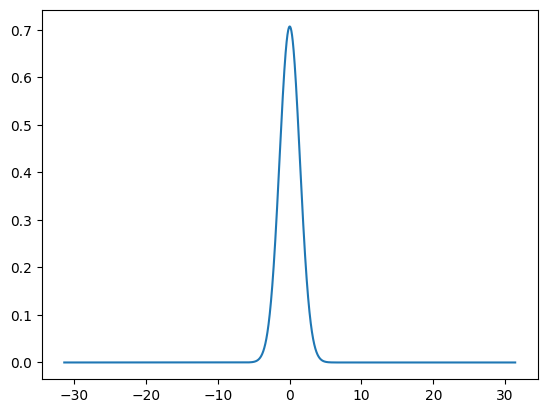

In [12]:
csv_dataframe = pd.read_csv('q4_data.csv', sep=",", header=None)
print(csv_dataframe)

# Convert the DataFrame to a NumPy array
data_array = csv_dataframe.to_numpy()

# Extract the real and imaginary parts to create a complex number array
complex_data = data_array[:, 0] + 1j * data_array[:, 1]

transformed_data = factor * np.fft.fftshift(complex_data) / np.sqrt(n)
plt.plot(k, np.real(transformed_data))


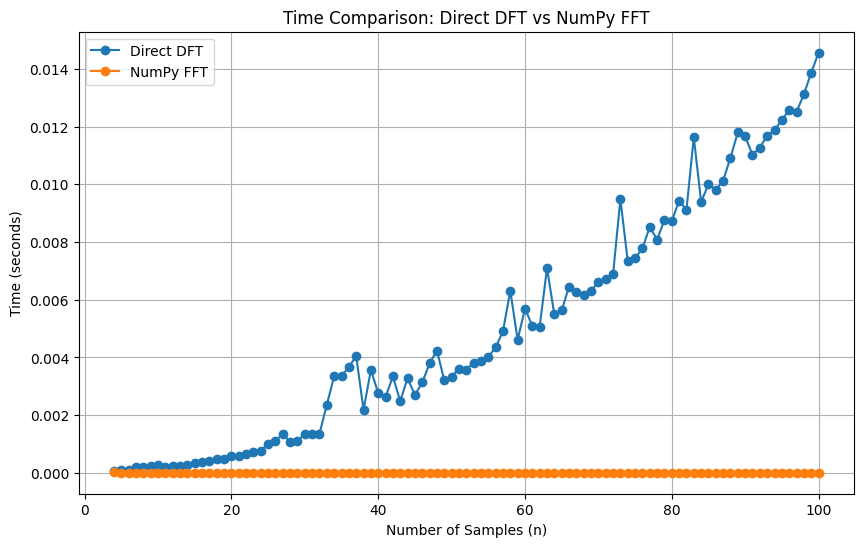

In [13]:
# Question 5


import numpy as np
import time
import matplotlib.pyplot as plt

def direct_discrete_fourier_transform(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

def measure_direct_dft_time(n_values):
    direct_times = []
    for n in n_values:
        x = np.random.rand(n) + 1j * np.random.rand(n)
        start_time = time.time()
        direct_discrete_fourier_transform(x)
        end_time = time.time()
        direct_times.append(end_time - start_time)
    return direct_times

def measure_fft_time(n_values):
    fft_times = []
    for n in n_values:
        x = np.random.rand(n) + 1j * np.random.rand(n)
        start_time = time.time()
        np.fft.fft(x)
        end_time = time.time()
        fft_times.append(end_time - start_time)
    return fft_times

n_values = range(4, 101)

direct_times = measure_direct_dft_time(n_values)
fft_times = measure_fft_time(n_values)

plt.figure(figsize=(10, 6))
plt.plot(n_values, direct_times, label='Direct DFT', marker='o')
plt.plot(n_values, fft_times, label='NumPy FFT', marker='o')
plt.title('Time Comparison: Direct DFT vs NumPy FFT')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


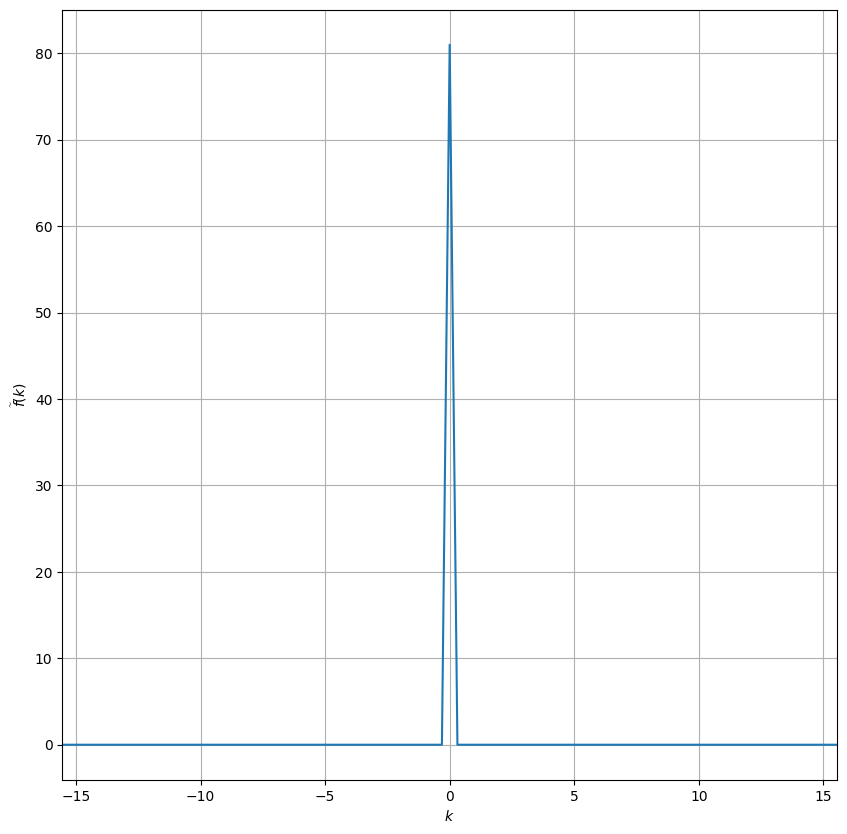

In [2]:
# Question 6

import numpy as np
import matplotlib.pyplot as plt

x_limit = 10
n = 101
delta = 2 * x_limit / (n - 1)
x_values = np.linspace(-x_limit, x_limit, n)
function_values = np.ones(n)
k = (2 * np.pi / (n * delta)) * np.arange(-(n - 1) / 2, (n - 1) / 2 + 1)
dft_result = np.fft.fft(function_values)
dft_result = np.fft.fftshift(dft_result)
scaling_factor = delta * np.sqrt(n / (2 * np.pi)) * np.exp(-1j * k * np.min(x_values))
ft_dft = scaling_factor * dft_result

fig = plt.figure(figsize=(10, 10))
plt.xlabel("$k$")
plt.ylabel("$\widetilde{f}(k)$")
plt.grid()
plt.margins(x=0)
plt.plot(k, ft_dft)
plt.show()


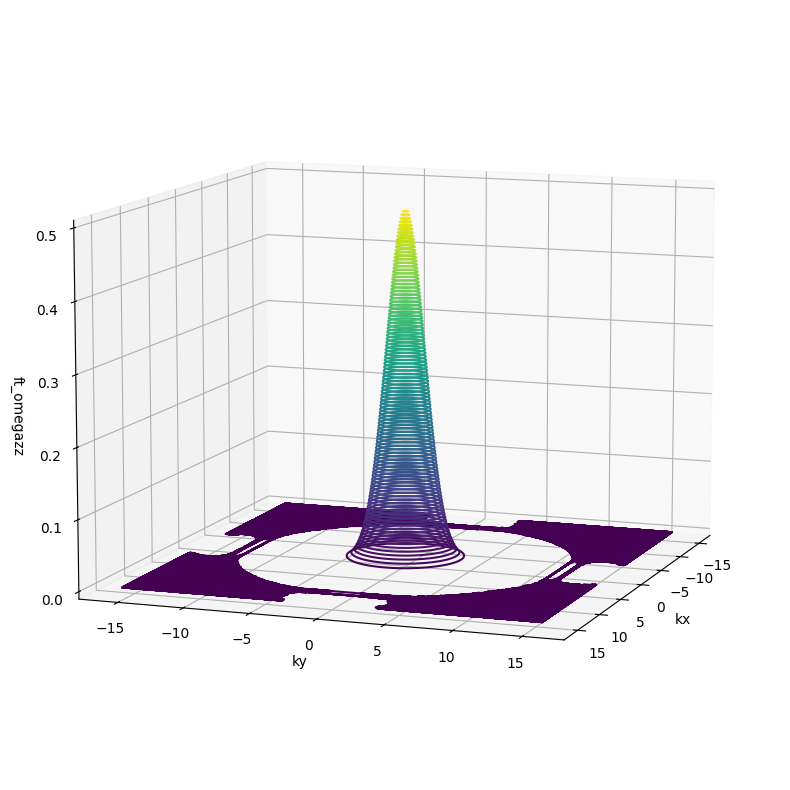

In [1]:
# Question 10
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define mesh parameters
mesh_limit = 500
mesh_size = 5001

# Generate mesh coordinates
x = np.linspace(-mesh_limit, mesh_limit, mesh_size)
y = np.linspace(-mesh_limit, mesh_limit, mesh_size)
xx, yy = np.meshgrid(x, y)
zz = np.exp(-(xx**2 + yy**2))

delta = 2 * mesh_limit / (mesh_size - 1)

kx = (2 * np.pi / (mesh_size * delta)) * np.arange(-(mesh_size - 1) / 2, (mesh_size - 1) / 2 + 1)
ky = kx
kxx, kyy = np.meshgrid(kx, ky)

omegazz = np.fft.fft2(zz, norm="ortho")
omegazz = np.fft.fftshift(omegazz)

factor = (delta ** 2) * (mesh_size / (2 * np.pi)) * np.exp(-1j * (kxx * np.min(x) + kyy * np.min(y)))
ft_omegazz = factor * omegazz

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(kxx, kyy, np.real(ft_omegazz), 100)
ax.view_init(10, 20)
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('ft_omegazz')
plt.show()

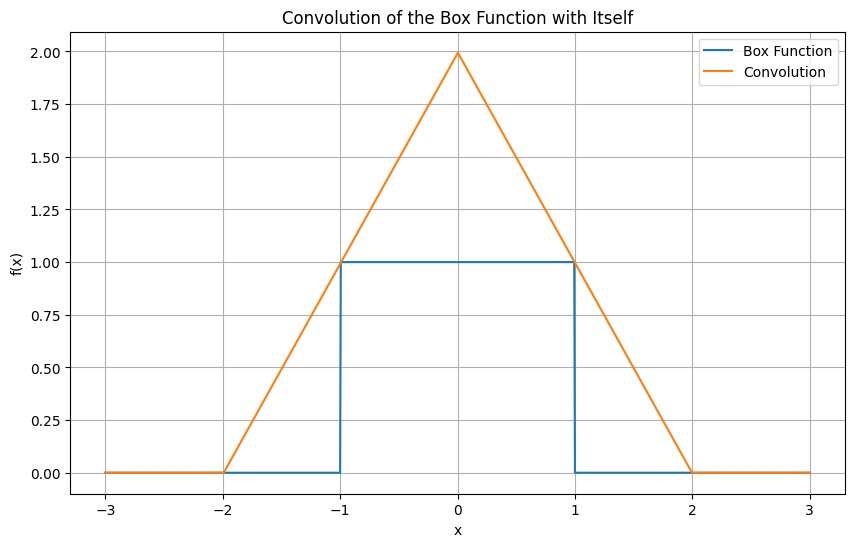

In [9]:
# Question 11

import numpy as np
import matplotlib.pyplot as plt

# Define the box function
def box_function(x):
    return np.where(np.logical_and(x > -1, x < 1), 1, 0)

x = np.linspace(-3, 3, 1000)
f_x = box_function(x)

convolution = np.convolve(f_x, f_x, mode='same') * (x[1] - x[0])  # Scale by the step size to preserve area

plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label='Box Function')
plt.plot(x, convolution, label='Convolution')
plt.title('Convolution of the Box Function with Itself')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.show()

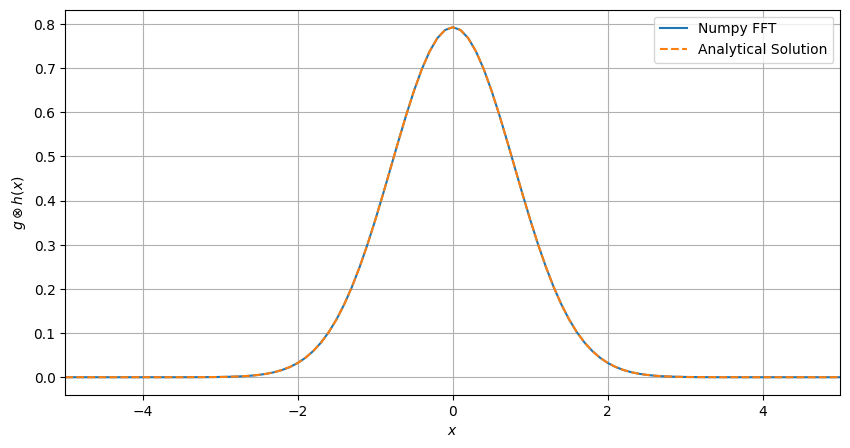

In [18]:
# Question 12

import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return np.exp(-x**2)

def h(x):
    return np.exp(-4 * x**2)

meshlim = 5
meshsize = 101

Delta = 2 * meshlim / (meshsize - 1)
x_values = np.linspace(-meshlim, meshlim, meshsize)

# Extend the functions to avoid aliasing
gx = np.append(np.vectorize(g, otypes=[float])(x_values[:meshsize]), np.zeros(meshsize - 1))
hx = np.append(np.vectorize(h, otypes=[float])(x_values[:meshsize]), np.zeros(meshsize - 1))

dft_g = np.fft.fft(gx, norm="ortho")
dft_h = np.fft.fft(hx, norm="ortho")

convolution = Delta * np.sqrt(2 * meshsize - 1) * np.fft.ifft(dft_g * dft_h, norm="ortho")

# Define the true analytical convolution function
def true_convolution(x):
    return np.sqrt(np.pi / 5) * np.exp(-(4 * x**2) / 5)

true_convolution_values = np.vectorize(true_convolution, otypes=[float])(x_values)

# Plot the results
plt.figure(figsize=(10, 5))
plt.xlabel("$x$")
plt.ylabel("$g \\otimes h(x)$")
plt.grid()
plt.margins(x=0)
plt.plot(x_values, convolution[int((2 * meshsize - 1) / 4):int(3 * (2 * meshsize - 1) / 4 + 1)], label='Numpy FFT')
plt.plot(x_values, true_convolution_values, '--', label='Analytical Solution')
plt.legend()
plt.show()

In [19]:
# Question 13

numbers=np.array([-0.2688931478, -0.2810077245, -0.192247966, 0.3091979974, 0.2222252908, 0.1613411458, -0.2850525372, -0.1462660015,
           0.2383177011, -0.1163222947, -0.2107665697, 0.2794335902, 0.1097473095, -0.2700622617, -0.1569469031, 0.3154710894,
           -0.1542748938, -0.1228533915, -0.2685363088, -0.2706004769, -0.313198955, -0.4134391376, 0.4736741665, 0.3248944824,
           0.4393124037, 0.4636855849, -0.2148542479, -0.1027268702, 0.1919177595, -0.0186060666, 0.1284019093, -0.144875371,
           -0.2158862392, 0.4499158768, 0.0662298126, 0.166474415, -0.3243225187, -0.4877341576, 0.313271301, 0.1605180492,
           -0.0300435355, -0.1404964128, -0.3842669269, 0.1490853727, -0.0208928628, -0.4061146504, -0.4477310102, 0.4457973697,
           -0.1300296032, 0.1782116066, 0.4941732508, 0.4192766741, 0.1903923343, -0.0584654533, -0.4529298266, -0.2255067279,
           -0.4193502346, 0.4065179655, 0.4159499907, -0.2035951729, 0.245749436, -0.07942266, -0.2901544887, -0.0727141017,
           -0.0712154848, -0.0480344683, -0.2032156676, -0.2721751027, 0.2003425085, 0.0222111261, -0.0326823389, -0.2317628865,
           0.2963619249, -0.001848021, 0.0451257549, -0.0884823951, -0.1366931894, -0.3238729143, 0.3093830799, -0.3720557997,
           -0.3809198358, 0.3854499106, 0.43421406, 0.1890028576, 0.4148572116, -0.2652322833, 0.3543577498, -0.001204551,
           -0.1449663307, -0.4866423891, 0.4972425832, 0.3691724294, 0.2127248183, -0.1000293446, 0.4538417287, 0.2416511807,
           -0.0494115795, -0.0208211201, 0.0393769004, 0.4649650382, 0.3259142931, 0.1820071668, -0.18111535, -0.2259159014,
           0.0070567507, -0.1744164121, 0.3337702579,-0.0076109614, -0.0414694034, 0.4608695249, 0.1741148816, 0.2015143138, -0.1709438733, -0.0234580208, 0.4420949296,
           -0.2363370773, 0.175733004, 0.2218480908, 0.3698033298, 0.3641769557, -0.2052430754, 0.0441521098, 0.1260436292,
           -0.4214207662, 0.3125290635, -0.4344462586, -0.1492507378, -0.3397884398, 0.2074336803, 0.4132356827, 0.1533315449,
           0.0223901605, 0.4257616097, 0.1373595073, -0.3680075735, 0.181086074, -0.0983058754, -0.3380408455, 0.4381654479,
           -0.4078960414, -0.2064848651, -0.1045514065, 0.1597545188, 0.1971594977, 0.4403414952, -0.1543259115, -0.3960711281,
           -0.224933317, -0.0748893775, 0.105508029, 0.1239680179, 0.3964286441, 0.005525526, 0.2227701163, -0.4311765587,
           0.4997682507, -0.0256645448, 0.2618468747, -0.2985797851, 0.4651833422, 0.1823202714, 0.3951940054, 0.3188235662,
           -0.3267912622, 0.1381094853, 0.1912400989, -0.1374391515, -0.0137524858, 0.0999000988, 0.43842876, -0.3810104572,
           0.0989857201, -0.1219142943, -0.2323025167, -0.0084752803, -0.0959240393, -0.180210367, -0.4094217666, -0.1587128268,
           0.0069855862, 0.3144493505, -0.3400278989, 0.2084851144, -0.070242664, -0.1363942434, 0.1388616342, -0.1419713932,
           0.4974452706, -0.2057381493, 0.4645380866, -0.0783973306, -0.2307541423, -0.4765782746, -0.2761129658, 0.2612273102,
           0.2723423436, -0.2221928202, -0.1404235328, -0.3407537528, -0.4195234529, 0.4283436452, -0.2599081802, -0.338113960,
           0.3844613902, -0.4257620632, -0.442425012, 0.0533426725, 0.0472734651, -0.4007835397, -0.3904993618, -0.3430244529,
           -0.1142090034, -0.318921842, -0.1146375095, 0.2665106277, -0.2918969728, -0.3185800818, 0.4948427771, -0.0340734205,
           0.1557761495, 0.1395409782, 0.012773378, 0.0799938097, 0.3929924017, -0.2311356734, -0.0364105928, 0.4217797039,
           -0.1677400775, 0.3866631873, 0.4957021796, -0.0099139093, -0.4705211506, -0.1393616016, 0.1907406441, -0.1306292928,
           0.3349619327, 0.3545584651, -0.2306519561, 0.4213670821, -0.2436592655, 0.3272163106, 0.0922066886, -0.2142314968,
           -0.4359845642, -0.1953429579, -0.4284385401, 0.2508732423, -0.4732244336, -0.3032378787, -0.1330076925, 0.4195754632,
           -0.0615863321, 0.0570527665, -0.1832797849, 0.3567231621, 0.2966164478, 0.0068158073, 0.3782229727,0.3046564488, -0.0569208908, 0.3343066315, -0.2168519072, 0.3904585269, -0.0066840006, 0.3651324332, -0.0980781085,
           -0.2142906532, -0.3648754396, -0.2502778997, 0.494816749, -0.1472523165, -0.0123950469, 0.3064336825, 0.4039521713,
           -0.156212104, 0.1858216386, 0.0994145103, -0.1204108562, -0.3896181526, -0.1071225009, -0.3564925128, -0.1773885688,
           -0.3837084775, -0.1862398968, 0.168768261, -0.4497164194, -0.0714710128, 0.4188877659, -0.4468807352, 0.0964925673,
           0.4504939428, 0.0022001593, -0.0388540504, -0.0112084481, 0.3551627236, -0.1700265878, -0.1889034194, -0.006565998,
           -0.118520313, -0.4342549056, -0.0311296036, 0.0500648836, 0.3426145638, 0.0522112215, 0.1079246041, 0.0820888064,
           -0.1819618765, 0.1755609468, -0.2035594361, -0.3966161057, 0.4726386336, 0.2767121459, -0.3931200935, 0.1756969377,
           0.2724708813, 0.047096591, 0.4417624155, 0.4557813918, 0.0344782876, 0.4786553766, 0.2354691601, 0.2864441505,
           0.2304293633, -0.1677529749, 0.0439665851, 0.3779601436, -0.3861732616, 0.4340362182, -0.0018690717, 0.4107975176,
           0.376900468, 0.0747563964, -0.0123534109, 0.3373881707, 0.06685077, -0.4102420359, 0.0305692646, 0.119173863,
           0.0030397234, 0.2714063378, 0.0840811582, 0.4785699911, 0.0213568872, 0.1046718012, -0.350944153, -0.2501563882,
           -0.0524206469, 0.2713582529, -0.4277286228, 0.3947431776, -0.4340261434, 0.0184627988, -0.1896349619, -0.2269720294,
           -0.1048609236, -0.2161377543, -0.3602818859, -0.2880756999, 0.3209966981, 0.4594355443, -0.1604861223, -0.0378117836,
           -0.4803753723, 0.0805769874, -0.4774751545, 0.0746606846, 0.3132175096, 0.1851760856, 0.2505643943, -0.1252832976,
           -0.236230539, 0.0659467017, 0.0790520471, 0.3887243611, 0.0255425742, -0.3253029645, 0.277013214, 0.3577057862,
           0.3274063601, -0.0620715297, -0.3481241756, 0.4385074312, 0.0503388007, 0.1372275604, 0.2781829706, -0.152439506,
           0.3630088496, 0.1402449903, -0.2586887058, 0.2402416255, -0.091468382, 0.4345668051, 0.0178548495, 0.0235960573,
           0.1748014803, 0.1378490267, 0.3483589624,-0.0182005467, -0.1000946151, -0.195650617, 0.3169495635, -0.1970418729, 0.4882094728, -0.4689174131, 0.4675137422,
           -0.1053128088, -0.0096113963, 0.1910356885, -0.0017009643, 0.1365611811, -0.2313575872, -0.296549199, 0.3722384649,
           0.1307385429, 0.0284579935, 0.494767878, -0.4623690642, -0.3090349524, 0.0703530758, -0.0483598009, 0.4673100101,
           -0.1426239907, -0.224616288, 0.0423456524, -0.2485113713, -0.0871401889, -0.3863106527, -0.4166992338, -0.1836406969,
           -0.4916457555, 0.1911872022, -0.2896305939, -0.2779338124, 0.2592139314, 0.1916831875, -0.256266775, -0.3402340529,
           -0.3420934822, 0.0816257894, -0.4280744903, -0.271200123, -0.0362488444, -0.034819119, 0.2126541038, -0.4987648535,
           -0.3269551541, -0.1114189952, -0.049961161, -0.1148002156, 0.4592351001, -0.0342124412, 0.0385683716, 0.2605691546,
           0.4150499708, -0.4263958465, 0.3485023935, -0.1704071293, 0.3536687763, -0.3053288139, -0.0455971667, -0.1930114252,
           -0.2856206428, 0.0706783286, -0.3185279769, 0.1119589766, 0.1373302609, 0.2636431266, 0.102112524, 0.1677644687,
           -0.1346017009, 0.3666984382, -0.0560845254, -0.1871539567, 0.3933074539, 0.0760030189, 0.1818607044, -0.4457157393,
           -0.228060173, 0.1074412063, -0.4764554878, -0.4982547354, 0.35435234, 0.2219605532, 0.4987254582, -0.1194746553,
           0.4047470905, 0.3165419179, 0.1112622336, -0.0203710814, -0.2989903583, -0.2744101785, 0.0836632692, -0.1261773549,
           -0.074082018, 0.3069539012, 0.4171672869, -0.1168545518, 0.2831904921, -0.1615675323, -0.2914377234, 0.3315184893,
           -0.0354904732, -0.4233418332, -0.0760012985, -0.0609809196, 0.2111052715, -0.4536339399, 0.2177576926, 0.0879100401,
           -0.0182817977, -0.3402847618, -0.1927347599])


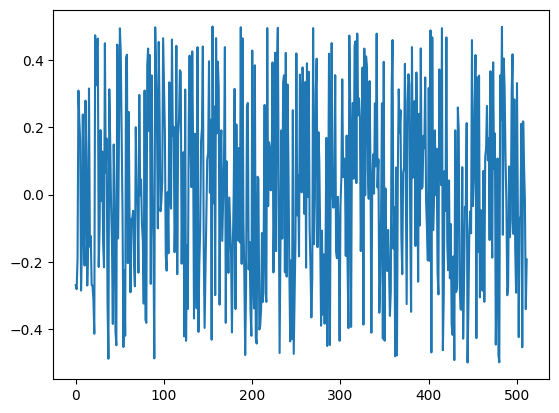

In [20]:
plt.plot(numbers)

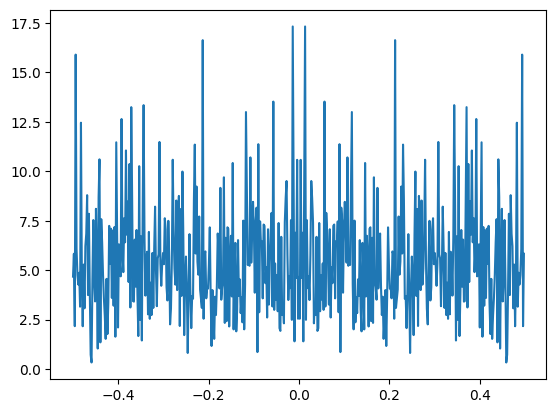

In [21]:
fft_numbers=np.fft.fftshift(np.fft.fft(numbers))
freqs = np.fft.fftshift(np.fft.fftfreq(len(numbers)))
plt.plot(freqs,np.abs(fft_numbers))

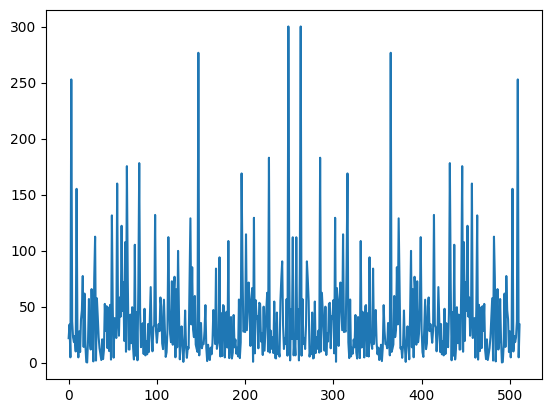

In [22]:
periodogram = np.abs(fft_numbers)**2
plt.plot(periodogram)

<BarContainer object of 10 artists>

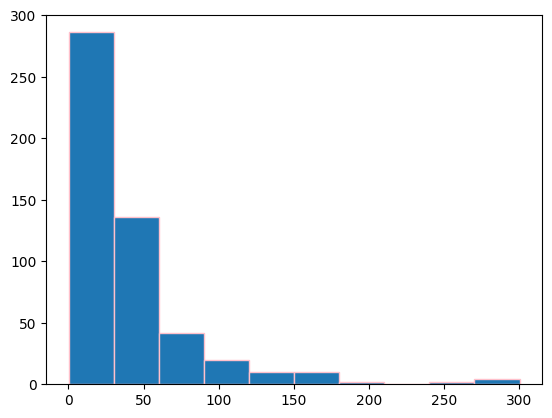

In [23]:
hist, bin_edges = np.histogram(periodogram,bins=10)
plt.bar(bin_edges[:-1],hist,width=np.diff(bin_edges), edgecolor="pink", align="edge")